In [13]:
import torch

checkpoint = torch.load("checkpoints/stock_36_24_ns_Transformer_custom_ftMS_sl36_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_h32_l2_0/checkpoint.pth")
print(checkpoint)


OrderedDict({'enc_embedding.value_embedding.tokenConv.weight': tensor([[[ 0.2300,  0.8316, -0.2430],
         [-0.3569, -0.1388, -0.7222],
         [ 0.1900,  0.0571,  0.6355]],

        [[-0.0786,  0.1769, -0.5253],
         [-0.3528,  0.5361,  0.2326],
         [-0.4377, -0.5471, -0.2426]],

        [[ 0.2361,  0.5612, -0.5113],
         [-0.1912, -0.0941,  0.1354],
         [-0.4739, -0.1189, -0.1978]],

        ...,

        [[ 0.5222,  0.7323, -0.0834],
         [ 0.5766, -0.7633,  0.7879],
         [-0.2808, -0.2832,  0.3711]],

        [[ 0.9521, -0.1422, -0.4816],
         [ 0.7528,  0.1583, -0.4328],
         [-1.1427,  1.2179,  0.4752]],

        [[-0.9892, -0.1790, -0.1283],
         [ 0.0267, -0.5875,  0.1307],
         [ 0.3546, -0.3097, -0.1432]]]), 'enc_embedding.position_embedding.pe': tensor([[[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.4030e-01,  8.2186e-01,  ...,  1.0000e+00,
           1.0

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les résultats
folder_path = "results/stock_36_24_ns_Transformer_custom_ftMS_sl36_ll18_pl24_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_h32_l2_0/"

true_values = np.load(folder_path + "true.npy")
predictions = np.load(folder_path + "pred.npy")
metrics = np.load(folder_path + "metrics.npy")
print(metrics)
name = np.array(["mae", "mse", "rmse", "mape", "mspe"])


[  0.66371554   2.3100357    1.5198802    3.177915   354.36627   ]


In [15]:
print(predictions)

[[[-0.14710315]
  [-0.14710328]
  [-0.1471032 ]
  ...
  [-0.14710358]
  [-0.1471035 ]
  [-0.1471038 ]]

 [[-0.11430407]
  [-0.11430422]
  [-0.11430424]
  ...
  [-0.11430422]
  [-0.11430436]
  [-0.11430413]]

 [[-0.11988552]
  [-0.11988581]
  [-0.11988579]
  ...
  [-0.11988606]
  [-0.11988603]
  [-0.11988627]]

 ...

 [[ 0.12377279]
  [ 0.12377276]
  [ 0.12377293]
  ...
  [ 0.12377343]
  [ 0.12377338]
  [ 0.12377313]]

 [[ 0.13049701]
  [ 0.13049679]
  [ 0.13049681]
  ...
  [ 0.1304974 ]
  [ 0.13049732]
  [ 0.13049749]]

 [[ 0.05774964]
  [ 0.05774952]
  [ 0.05774954]
  ...
  [ 0.05775017]
  [ 0.0577502 ]
  [ 0.0577502 ]]]


In [16]:
print(true_values.shape)
print(predictions.shape)

(634, 24, 1)
(634, 24, 1)


In [17]:
import pandas as pd

dtest = pd.DataFrame([name, metrics])
print(dtest)


          0         1        2         3           4
0       mae       mse     rmse      mape        mspe
1  0.663716  2.310036  1.51988  3.177915  354.366272


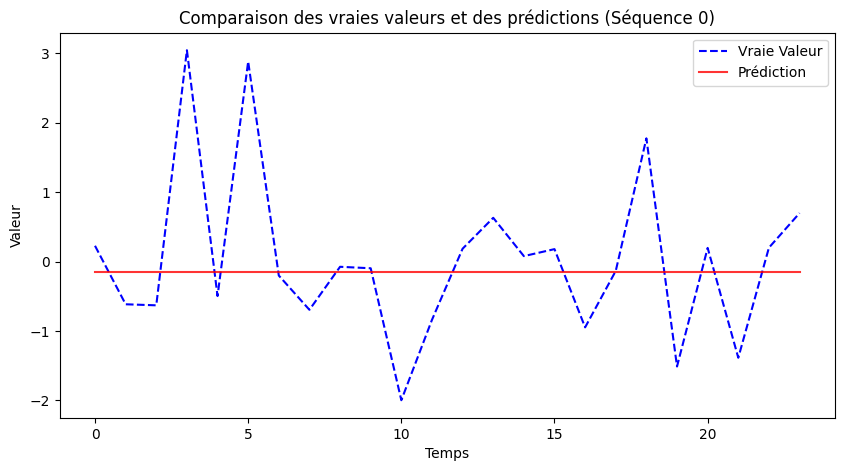

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner un exemple de série temporelle (par exemple, la première séquence testée)
index = 0  # Tu peux changer cet index pour voir d'autres séquences
true_series = true_values[index, :, 0]  # Première variable (colonne 0)
pred_series = predictions[index, :, 0]  # Première variable (colonne 0)

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(true_series, label="Vraie Valeur", linestyle="dashed", color="blue")
plt.plot(pred_series, label="Prédiction", color="red", alpha=0.8)
plt.legend()
plt.title(f"Comparaison des vraies valeurs et des prédictions (Séquence {index})")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show()


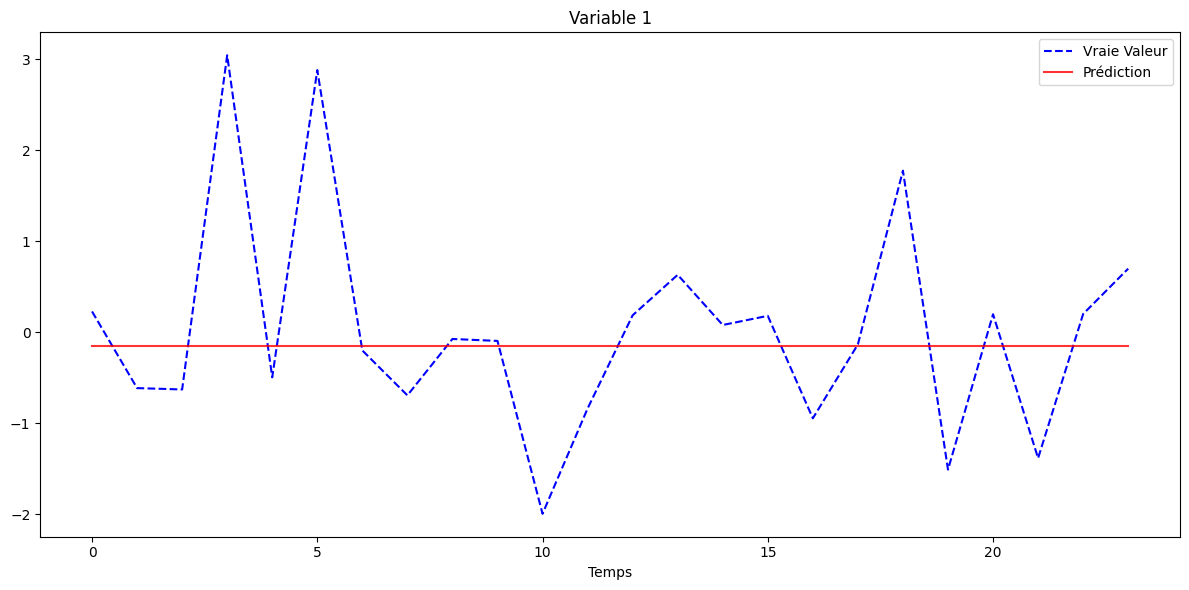

In [19]:
num_vars = 1  # Nombre de variables à afficher

plt.figure(figsize=(12, 6))
for i in range(num_vars):
    plt.subplot(num_vars, 1, i + 1)
    plt.plot(true_values[index, :, i], label="Vraie Valeur", linestyle="dashed", color="blue")
    plt.plot(predictions[index, :, i], label="Prédiction", color="red", alpha=0.8)
    plt.legend()
    plt.title(f"Variable {i+1}")

plt.xlabel("Temps")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
data = pd.read_csv("./dataset/exchange_rate/exchange_rate.csv")
data2 = pd.read_csv("./dataset/stock_var/stock.csv")
print(data.dtypes)
print(data2.dtypes)

date     object
0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
OT      float64
dtype: object
date      object
AAPL     float64
GOOGL    float64
OT       float64
dtype: object
